## Author : Onkar Hatture

## Batch : April TechnoHacks Edu Tech

## Telco Churn Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

*Load the data file *

In [2]:
df=pd.read_csv('Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


Look at the top 5 records of data

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df.size

147903

In [8]:
df.shape

(7043, 21)

In [9]:
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [12]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [13]:
df.TotalCharges=pd.to_numeric(df.TotalCharges,errors='coerce')
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [14]:
df.nunique().value_counts()

3       9
2       7
7043    1
73      1
4       1
1585    1
6530    1
dtype: int64

In [15]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [16]:
df['gender']=df['gender'].map({'Female':0,'Male':1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [18]:
df['Partner']=df['Partner'].map({'Yes':0,'No':1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [20]:
df['Dependents']=df['Dependents'].map({'No':0,'Yes':1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [21]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [22]:
df['PhoneService']=df['PhoneService'].map({'Yes':1,'No':0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [23]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [24]:
df['MultipleLines']=df['MultipleLines'].map({'No':0,'Yes':1,'No phone service':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [26]:
df['InternetService']=df['InternetService'].map({'Fiber optic':1,'DSL':2,'No':0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [27]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [28]:
df['OnlineSecurity']=df['OnlineSecurity'].map({'No':0,'Yes':1,'No internet service':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [30]:
df['DeviceProtection']=df['DeviceProtection'].map({'No':0,'Yes':1,'No internet service':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [31]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [32]:
df['TechSupport']=df['TechSupport'].map({'No':0,'Yes':1,'No internet service':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [34]:
df['StreamingTV']=df['StreamingTV'].map({'No':0,'Yes':1,'No internet service':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [35]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [36]:
df['StreamingMovies']=df['StreamingMovies'].map({'No':0,'Yes':1,'No internet service':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,0,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,0,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,0,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,0,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [37]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [38]:
df['Contract']=df['Contract'].map({'Month-to-month':0,'two year':1,'One year':2})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,0,0.0,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,0,2.0,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,0,0.0,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,0,2.0,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,0,0.0,Yes,Electronic check,70.70,151.65,Yes


In [39]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [40]:
df['PaperlessBilling']=df['PaperlessBilling'].map({'Yes':1,'No':0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,0,0.0,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,0,2.0,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,0,0.0,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,0,2.0,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,0,0.0,1,Electronic check,70.70,151.65,Yes


In [41]:

df['OnlineBackup']=df['OnlineBackup'].map({'Yes':1,'No':0})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,0,0.0,1,Electronic check,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,0,2.0,0,Mailed check,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,0,0.0,1,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,0,2.0,0,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,0,0.0,1,Electronic check,70.70,151.65,Yes


In [42]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [43]:
df['PaymentMethod']=df['PaymentMethod'].map({'Electronic check':0,'Mailed check':1,'Bank transfer (automatic)':2,'Credit card (automatic)':3})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,0,0.0,1,0,29.85,29.85,No
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,0,2.0,0,1,56.95,1889.50,No
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,0,0.0,1,1,53.85,108.15,Yes
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,0,2.0,0,2,42.30,1840.75,No
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,0,0.0,1,0,70.70,151.65,Yes


In [44]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [45]:
df['Churn'].value_counts()/len(df['Churn'])

No     0.73463
Yes    0.26537
Name: Churn, dtype: float64

Data is highly inbalanced 73:27


so we need to analyis data with other feature while tacking the target values sepeartly to get some insights  

Text(0.5, 1.02, 'count of target variabel as per category')

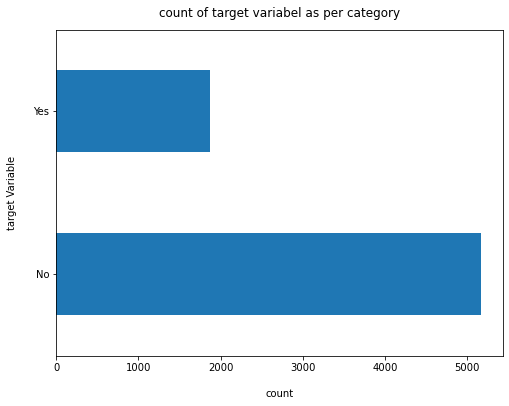

In [46]:
df['Churn'].value_counts().plot(kind='barh',figsize=(8,6))
plt.xlabel('count',labelpad=16)
plt.ylabel('target Variable',labelpad=16)
plt.title('count of target variabel as per category',y=1.02)

In [47]:
df['Churn']=df['Churn'].map({'No':0,'Yes':1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,0,0,1,0,2,2,0,...,0,0,0,0,0.0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,1,0,34,1,0,2,1,...,1,0,0,0,2.0,0,1,56.95,1889.50,0
2,3668-QPYBK,1,0,1,0,2,1,0,2,1,...,0,0,0,0,0.0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,1,0,45,0,2,2,1,...,1,1,0,0,2.0,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,1,0,2,1,0,1,0,...,0,0,0,0,0.0,1,0,70.70,151.65,1


In [48]:
df.duplicated().sum()

0

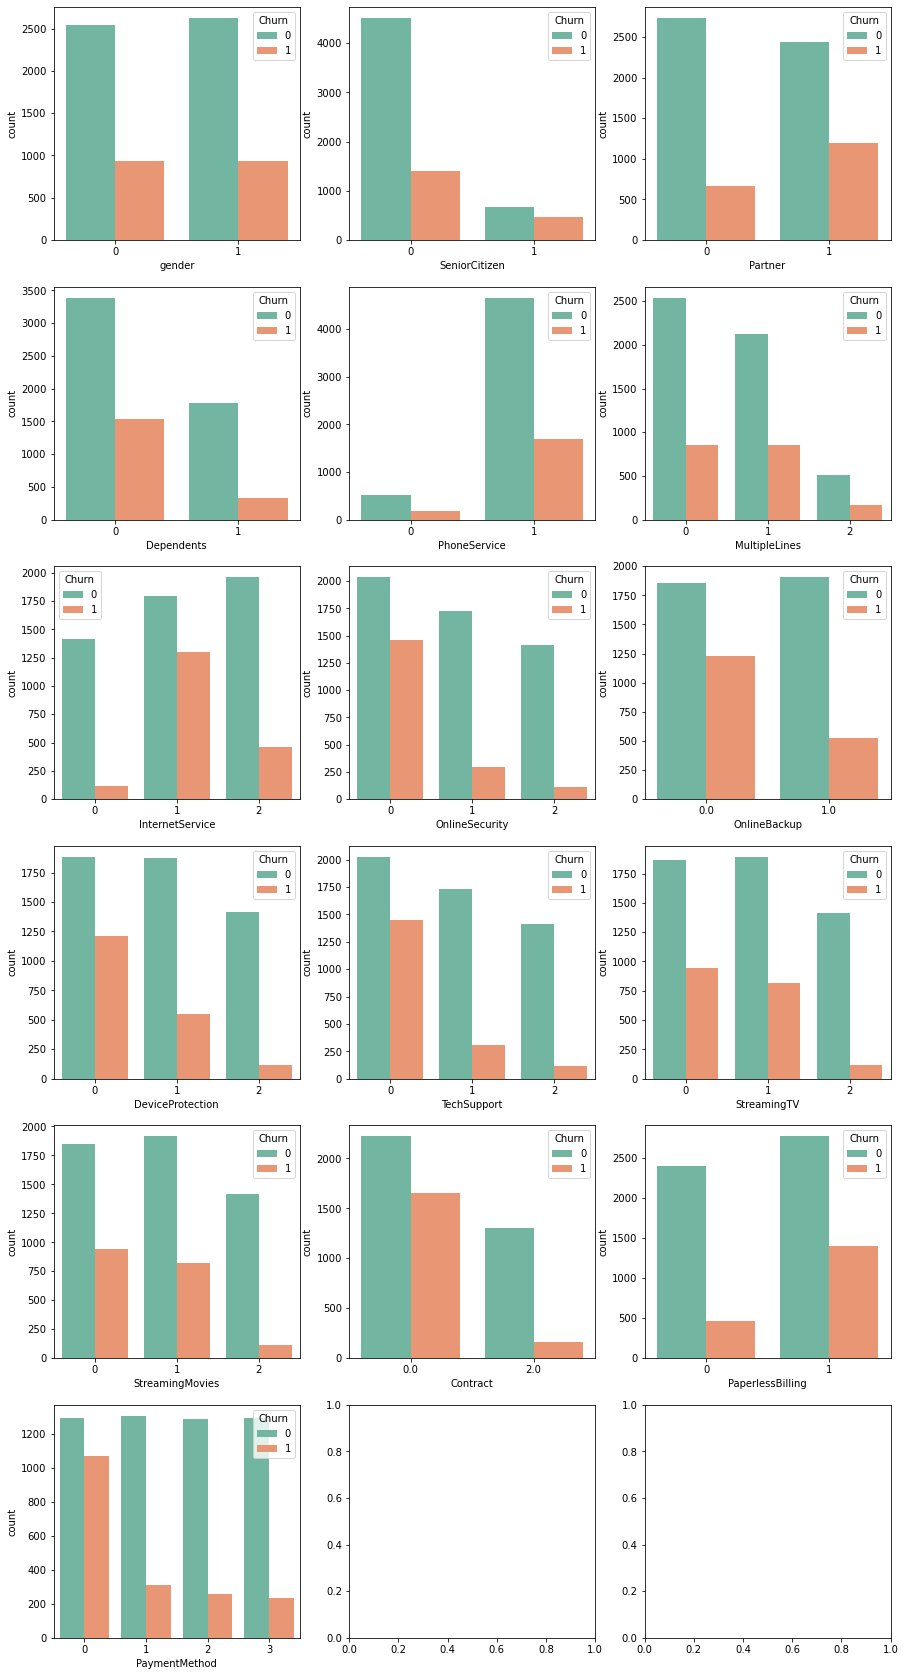

In [49]:
fig,axes=plt.subplots(6,3, figsize=(15, 30))
axes = axes.flatten()

categories = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
              'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 
              'StreamingTV', 'StreamingMovies', 'Contract','PaperlessBilling', 'PaymentMethod']

for i in range(len(categories)):
    
    ax= sns.countplot(x=categories[i], data = df, palette = 'Set2', ax=axes[i], hue = 'Churn')

In [50]:
df.corr()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
gender,1.000000,-0.001874,0.001808,0.010517,0.005106,-0.006488,-0.000485,0.000863,-0.003429,-0.014025,0.005092,0.000985,0.001156,-0.000191,0.008340,-0.011754,-0.005209,-0.014569,0.000048,-0.008612
SeniorCitizen,-0.001874,1.000000,-0.016479,-0.211185,0.016567,0.008576,0.099883,0.032310,-0.210897,-0.003577,-0.157095,-0.223770,-0.130130,-0.120802,-0.090929,0.156530,-0.093704,0.220173,0.102411,0.150889
Partner,0.001808,-0.016479,1.000000,-0.452676,-0.379697,-0.017706,-0.090981,0.000891,-0.081850,-0.173251,-0.094451,-0.069072,-0.080127,-0.075779,-0.188110,0.014877,-0.133115,-0.096848,-0.319072,0.150448
Dependents,0.010517,-0.211185,-0.452676,1.000000,0.159712,-0.001762,-0.016875,-0.044590,0.190523,0.097615,0.156439,0.180832,0.140395,0.125820,0.162541,-0.111377,0.123844,-0.113890,0.064653,-0.164221
tenure,0.005106,0.016567,-0.379697,0.159712,1.000000,0.008448,0.242279,0.030359,0.145298,0.421591,0.178649,0.144459,0.136145,0.140781,0.510475,0.006152,0.340305,0.247900,0.825880,-0.352229
PhoneService,-0.006488,0.008576,-0.017706,-0.001762,0.008448,1.000000,-0.691070,-0.387436,0.125353,0.014718,0.138755,0.123350,0.171538,0.165205,-0.002119,0.016505,-0.004070,0.247398,0.113008,0.011942
MultipleLines,-0.000485,0.099883,-0.090981,-0.016875,0.242279,-0.691070,1.000000,0.340949,-0.235021,0.095544,-0.200463,-0.232155,-0.202414,-0.195815,0.026047,0.108230,0.030659,0.146153,0.251357,0.019423
InternetService,0.000863,0.032310,0.000891,-0.044590,0.030359,-0.387436,0.340949,1.000000,-0.607788,0.014784,-0.662957,-0.609795,-0.712890,-0.709020,-0.026340,0.138625,-0.008124,0.323260,0.175691,0.047291
OnlineSecurity,-0.003429,-0.210897,-0.081850,0.190523,0.145298,0.125353,-0.235021,-0.607788,1.000000,0.179711,0.749040,0.791225,0.701976,0.704984,0.242681,-0.334003,0.213800,-0.621227,-0.153234,-0.332819
OnlineBackup,-0.014025,-0.003577,-0.173251,0.097615,0.421591,0.014718,0.095544,0.014784,0.179711,1.000000,0.185155,0.190586,0.146935,0.136687,0.217211,0.005437,0.165867,0.252337,0.431750,-0.196061


In [51]:
corr= df.corr()

<AxesSubplot:>

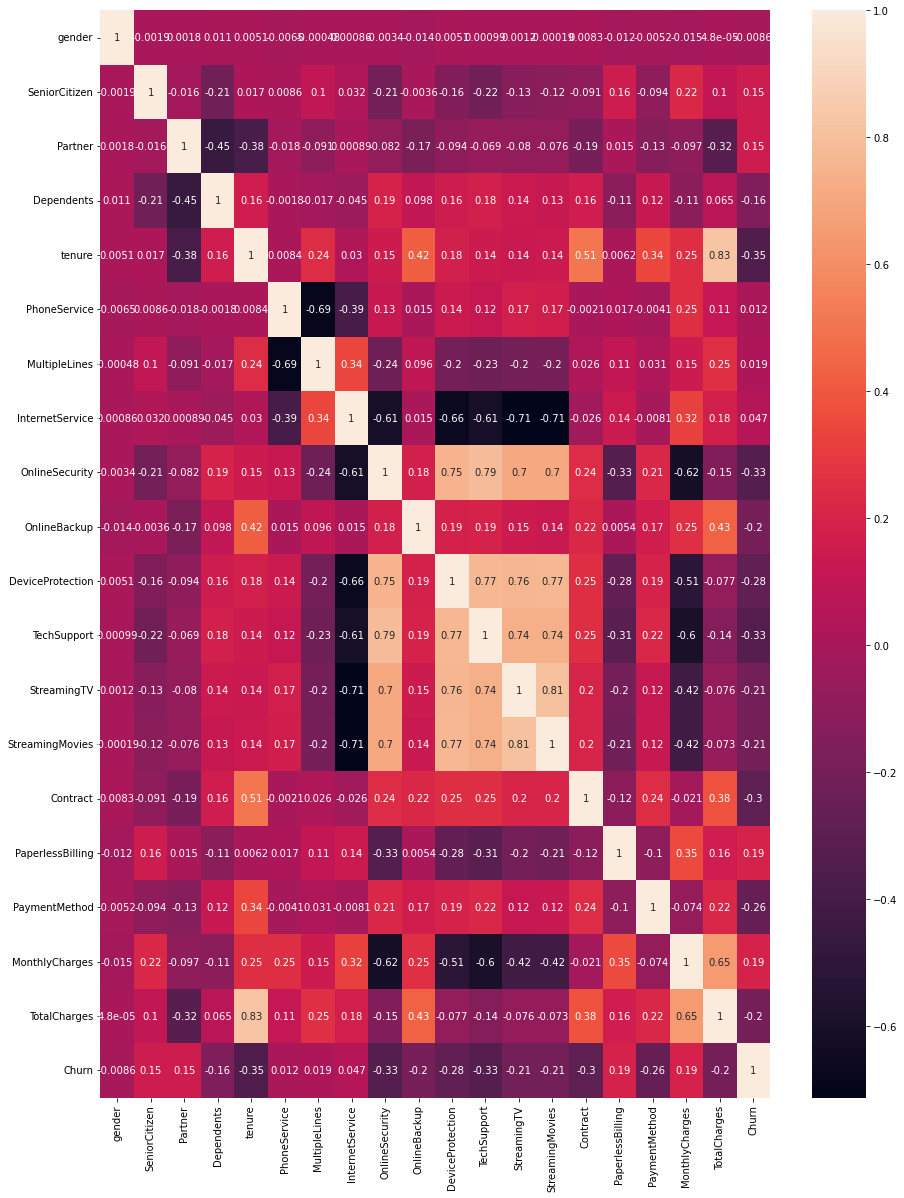

In [52]:
plt.figure(figsize=(15,20))
sns.heatmap(corr,annot =True)

In [53]:
#plt.figure(figsize=(15,30))
#g = sns.PairGrid(df)
#g.map(plt.scatter)

<Figure size 1080x2160 with 0 Axes>

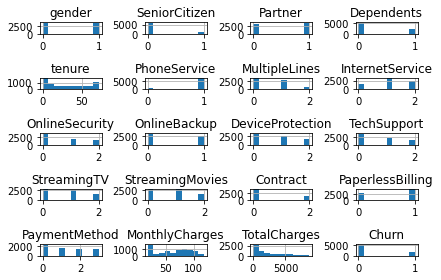

In [54]:
plt.figure(figsize=(15,30))
df.hist()
plt.tight_layout()

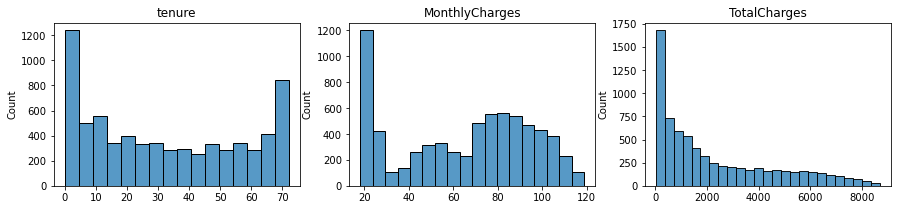

In [55]:
fig,axes=plt.subplots(1,3, figsize=(15, 3))
numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']

ax = sns.histplot(df['tenure'].values, ax=axes[0]).set_title('tenure')
ax = sns.histplot(df['MonthlyCharges'].values, ax=axes[1]).set_title('MonthlyCharges')
ax = sns.histplot(df['TotalCharges'].values, ax=axes[2]).set_title('TotalCharges')

## Missing Value Treatement

Since the % of these records compared to total dataset is very low ie 0.15%, it is safe to ignore them from further processing.

In [56]:
df.dropna(how='any',inplace =True)

In [57]:
print(df['tenure'].max())

72


In [58]:
#drop column customerID and tenure
df.drop(columns= ['customerID','tenure'], axis=1, inplace=True)
df.head()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,2,2,0,1.0,0,0,0,0,0.0,1,0,29.85,29.85,0
1,1,0,1,0,1,0,2,1,0.0,1,0,0,0,2.0,0,1,56.95,1889.50,0
2,1,0,1,0,1,0,2,1,1.0,0,0,0,0,0.0,1,1,53.85,108.15,1
3,1,0,1,0,0,2,2,1,0.0,1,1,0,0,2.0,0,2,42.30,1840.75,0
4,0,0,1,0,1,0,1,0,0.0,0,0,0,0,0.0,1,0,70.70,151.65,1


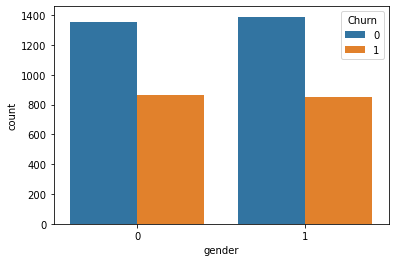

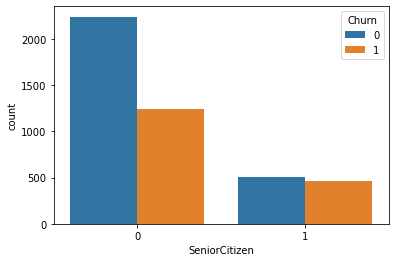

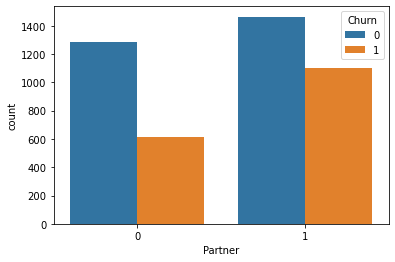

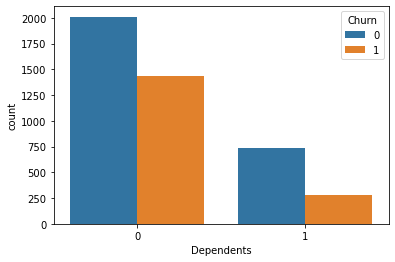

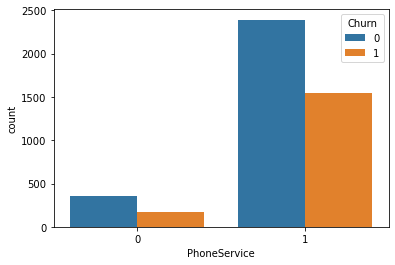

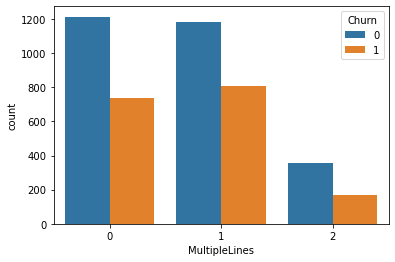

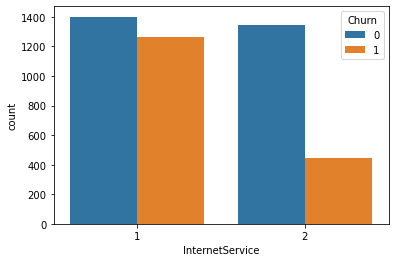

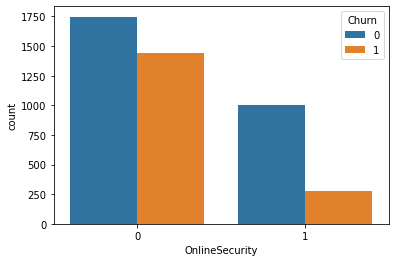

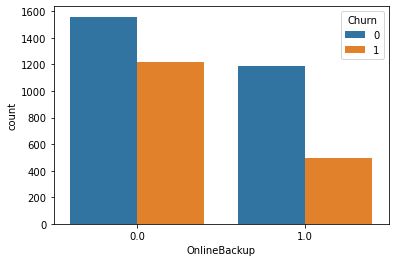

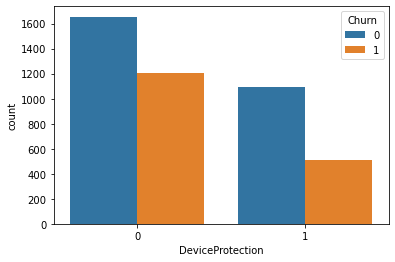

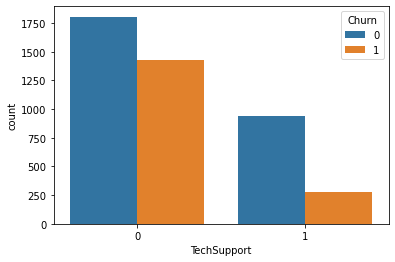

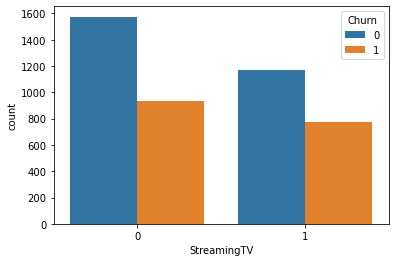

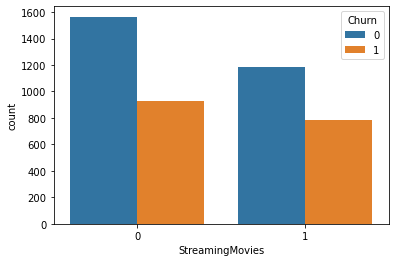

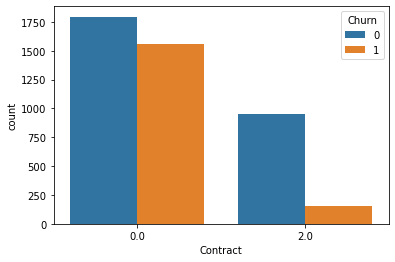

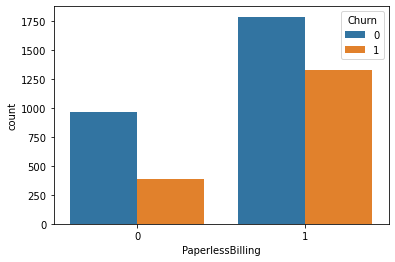

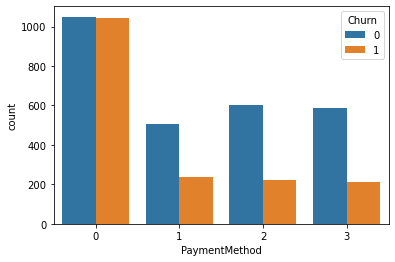

In [59]:
for i, predictor in enumerate(df.drop(columns=['Churn', 'TotalCharges', 'MonthlyCharges'])):
    plt.figure(i)
    sns.countplot(data=df, x=predictor, hue='Churn')

In [60]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [61]:
print(x)

      gender  SeniorCitizen  Partner  Dependents  PhoneService  MultipleLines  \
0          0              0        0           0             0              2   
1          1              0        1           0             1              0   
2          1              0        1           0             1              0   
3          1              0        1           0             0              2   
4          0              0        1           0             1              0   
...      ...            ...      ...         ...           ...            ...   
7036       0              0        1           0             0              2   
7038       1              0        0           1             1              1   
7039       0              0        0           1             1              1   
7040       0              0        0           1             0              2   
7041       1              1        0           0             1              1   

      InternetService  Onli

In [62]:
print(y)

0       0
1       0
2       1
3       0
4       1
       ..
7036    0
7038    0
7039    0
7040    0
7041    1
Name: Churn, Length: 4460, dtype: int64


## Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [64]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [67]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [68]:
y_pred=model_rf.predict(x_test)

In [69]:
model_rf.score(x_test,y_test)

0.7253363228699552

In [70]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       554
           1       0.66      0.56      0.61       338

    accuracy                           0.73       892
   macro avg       0.71      0.69      0.70       892
weighted avg       0.72      0.73      0.72       892

